In [ ]:
#   Topic : Credit Card Approval Prediction
#   Group No. 26
#       EG/2020/4054    Madushani G.K.H.P
#       EG/2020/4066    Mallawaarachchi M.R.I.G

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
application_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EE5253_2023_Code_Group26/application_record.csv')
credit_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EE5253_2023_Code_Group26/credit_record.csv')

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Binary data

In [ ]:
application_data['CODE_GENDER'].value_counts()

F    294440
M    144117
Name: CODE_GENDER, dtype: int64

In [ ]:
application_data['FLAG_OWN_CAR'].value_counts()

N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64

In [ ]:
application_data['FLAG_OWN_REALTY'].value_counts()

Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64

In [ ]:
application_data['FLAG_MOBIL'].value_counts()

1    438557
Name: FLAG_MOBIL, dtype: int64

In [ ]:
application_data['FLAG_WORK_PHONE'].value_counts()

0    348156
1     90401
Name: FLAG_WORK_PHONE, dtype: int64

In [ ]:
application_data['FLAG_PHONE'].value_counts()

0    312353
1    126204
Name: FLAG_PHONE, dtype: int64

In [ ]:
application_data['FLAG_EMAIL'].value_counts()

0    391102
1     47455
Name: FLAG_EMAIL, dtype: int64

In [ ]:
# Converting binary features( CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY )
application_data['CODE_GENDER'].replace({'M': 1, 'F': 0}, inplace=True)
application_data.rename(columns={'CODE_GENDER': 'MALE'}, inplace=True)

application_data['FLAG_OWN_CAR'].replace({'Y':1, 'N':0}, inplace=True)
application_data.rename(columns={'FLAG_OWN_CAR' : 'OWN_CAR'}, inplace=True)

application_data['FLAG_OWN_REALTY'].replace({'Y':1, 'N':0}, inplace=True)
application_data.rename(columns={'FLAG_OWN_REALTY' : 'OWN_PROPERTY'}, inplace=True)

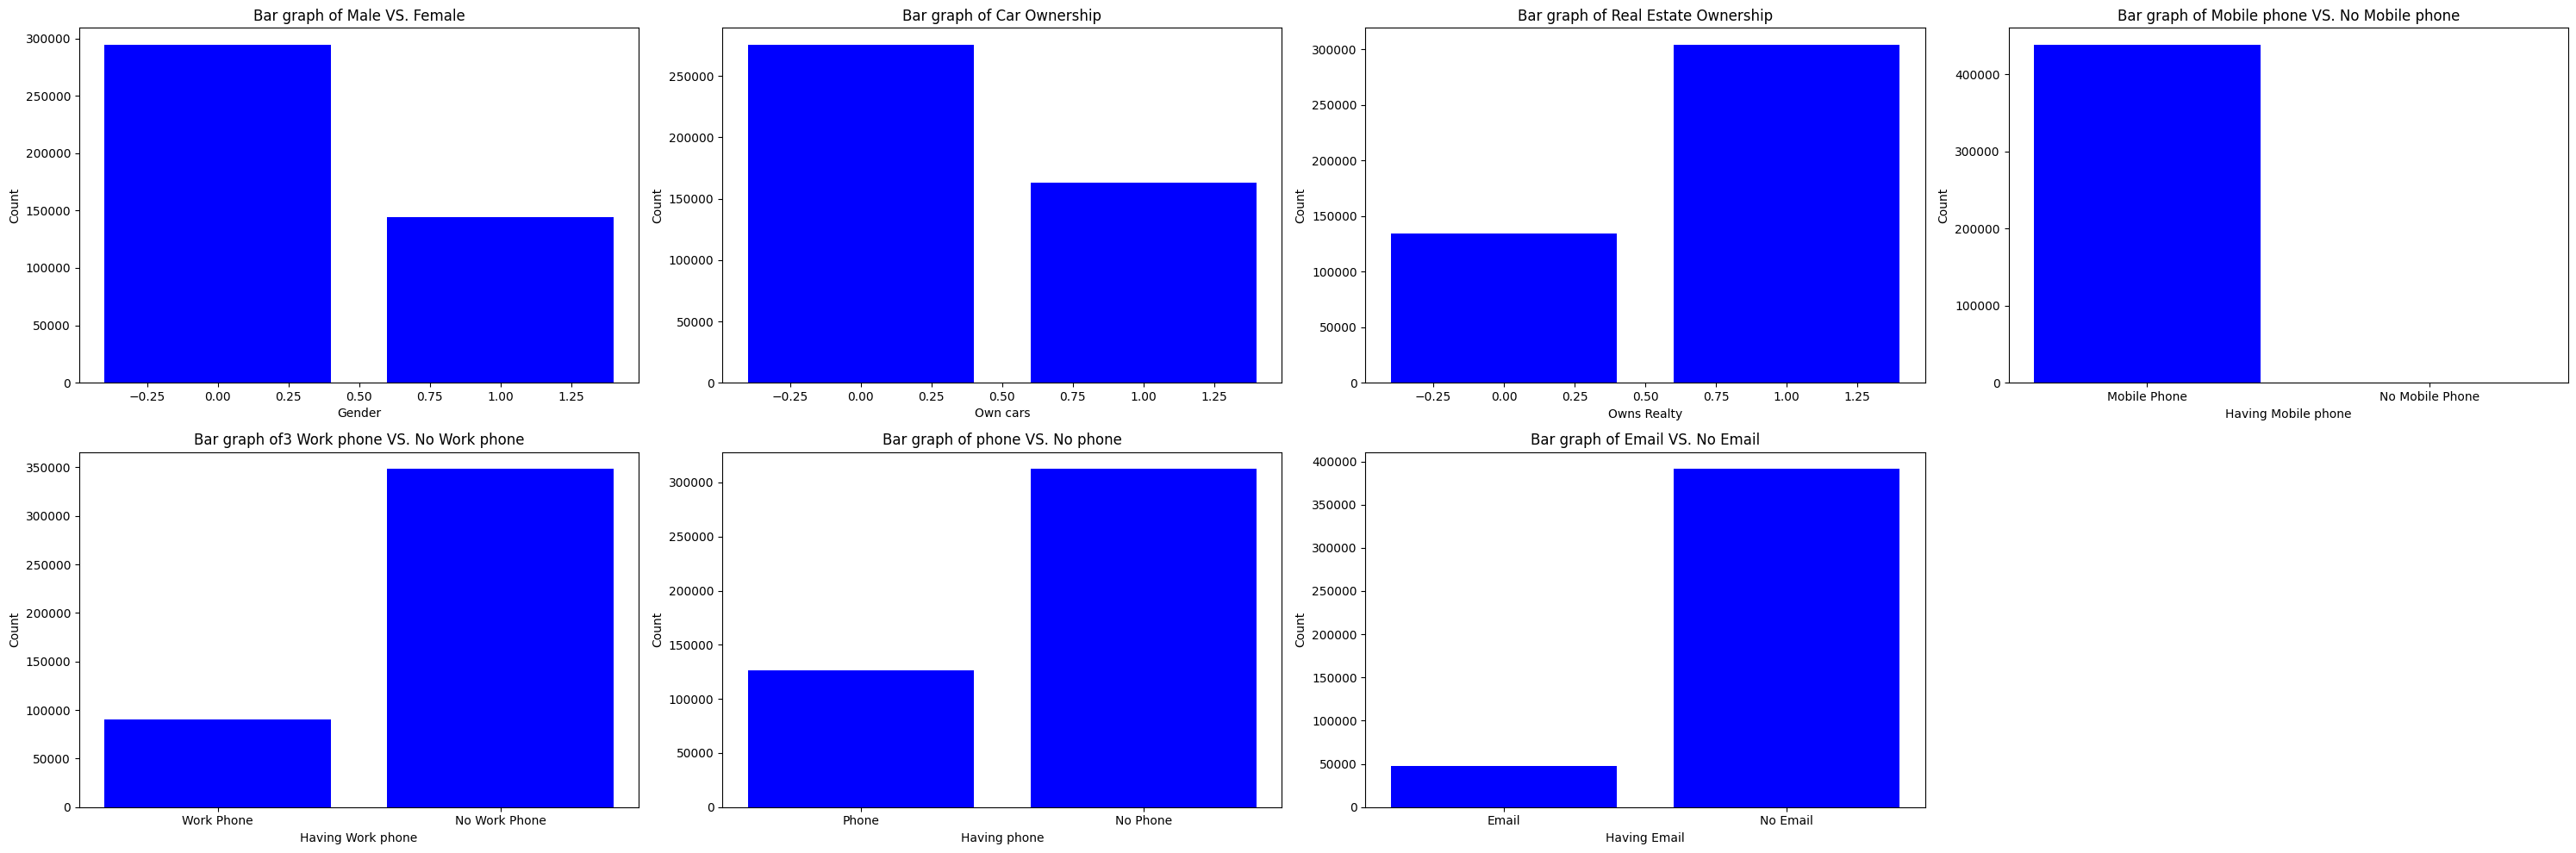

In [ ]:
# Bar charts for Binary Data
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))

# code_gender
gender_counts = application_data['MALE'].value_counts()
axs[0,0].bar(gender_counts.index, gender_counts.values, color='blue')
axs[0,0].set_title("Bar graph of Male VS. Female")
axs[0,0].set_xlabel("Gender")
axs[0,0].set_ylabel("Count")

# own_car
car_counts = application_data['OWN_CAR'].value_counts()
axs[0,1].bar(car_counts.index, car_counts.values, color='blue')
axs[0,1].set_title("Bar graph of Car Ownership")
axs[0,1].set_xlabel("Own cars")
axs[0,1].set_ylabel("Count")

# own_realty
realty_counts = application_data['OWN_PROPERTY'].value_counts()
axs[0,2].bar(realty_counts.index, realty_counts.values, color='blue')
axs[0,2].set_title("Bar graph of Real Estate Ownership")
axs[0,2].set_xlabel("Owns Realty")
axs[0,2].set_ylabel("Count")

# flag_mobile
labels = ["Mobile Phone", "No Mobile Phone"]
values = [application_data['FLAG_MOBIL'].sum(), len(application_data) - application_data['FLAG_MOBIL'].sum()]
axs[0,3].bar(labels,values, color='blue')
axs[0,3].set_title("Bar graph of Mobile phone VS. No Mobile phone")
axs[0,3].set_xlabel("Having Mobile phone")
axs[0,3].set_ylabel("Count")

# flag_mobile
labels = ["Work Phone", "No Work Phone"]
values = [application_data['FLAG_WORK_PHONE'].sum(), len(application_data) - application_data['FLAG_WORK_PHONE'].sum()]
axs[1,0].bar(labels,values, color='blue')
axs[1,0].set_title("Bar graph of3 Work phone VS. No Work phone")
axs[1,0].set_xlabel("Having Work phone")
axs[1,0].set_ylabel("Count")

# flag_phone
labels = ["Phone", "No Phone"]
values = [application_data['FLAG_PHONE'].sum(), len(application_data) - application_data['FLAG_PHONE'].sum()]
axs[1,1].bar(labels,values, color='blue')
axs[1,1].set_title("Bar graph of phone VS. No phone")
axs[1,1].set_xlabel("Having phone")
axs[1,1].set_ylabel("Count")

# flag_email
labels = ["Email", "No Email"]
values = [application_data['FLAG_EMAIL'].sum(), len(application_data) - application_data['FLAG_EMAIL'].sum()]
axs[1,2].bar(labels,values, color='blue')
axs[1,2].set_title("Bar graph of Email VS. No Email")
axs[1,2].set_xlabel("Having Email")
axs[1,2].set_ylabel("Count")

fig.delaxes(axs[1,3])

plt.tight_layout()
plt.show()


In [ ]:
application_data['CNT_CHILDREN'].value_counts()

0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

In [ ]:
application_data['AMT_INCOME_TOTAL'].value_counts()

135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: AMT_INCOME_TOTAL, Length: 866, dtype: int64

In [ ]:
application_data['CNT_FAM_MEMBERS'].value_counts()

2.0     233891
1.0      84492
3.0      77128
4.0      37356
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
14.0         4
8.0          4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

Date type features

In [ ]:
application_data['DAYS_BIRTH'].value_counts()

-11707    150
-14178    121
-14400    116
-13482    112
-13274    112
         ... 
-8207       1
-8286       1
-12793      1
-24592      1
-8590       1
Name: DAYS_BIRTH, Length: 16379, dtype: int64

In [ ]:
application_data['DAYS_EMPLOYED'].value_counts()

 365243    75329
-218         262
-1678        251
-249         241
-978         240
           ...  
-13529         1
-10223         1
-8917          1
-11429         1
-8105          1
Name: DAYS_EMPLOYED, Length: 9406, dtype: int64

In [ ]:
# converting date features
application_data['DAYS_BIRTH'] = np.floor(-application_data['DAYS_BIRTH'] / 365.25)
application_data.rename(columns={'DAYS_BIRTH' : 'AGE'}, inplace=True)


application_data['EXPERIENCE_IN_MONTHS'] = np.where(application_data['DAYS_EMPLOYED'] < 0,
                                                np.floor(-application_data['DAYS_EMPLOYED'] / 30.4375),
                                                np.nan)

application_data['EXPERIENCE_IN_MONTHS'].fillna(value=0, inplace=True)
application_data['EXPERIENCE_IN_MONTHS'] = application_data['EXPERIENCE_IN_MONTHS'].astype(int)

application_data.drop('DAYS_EMPLOYED', axis=1, inplace=True)

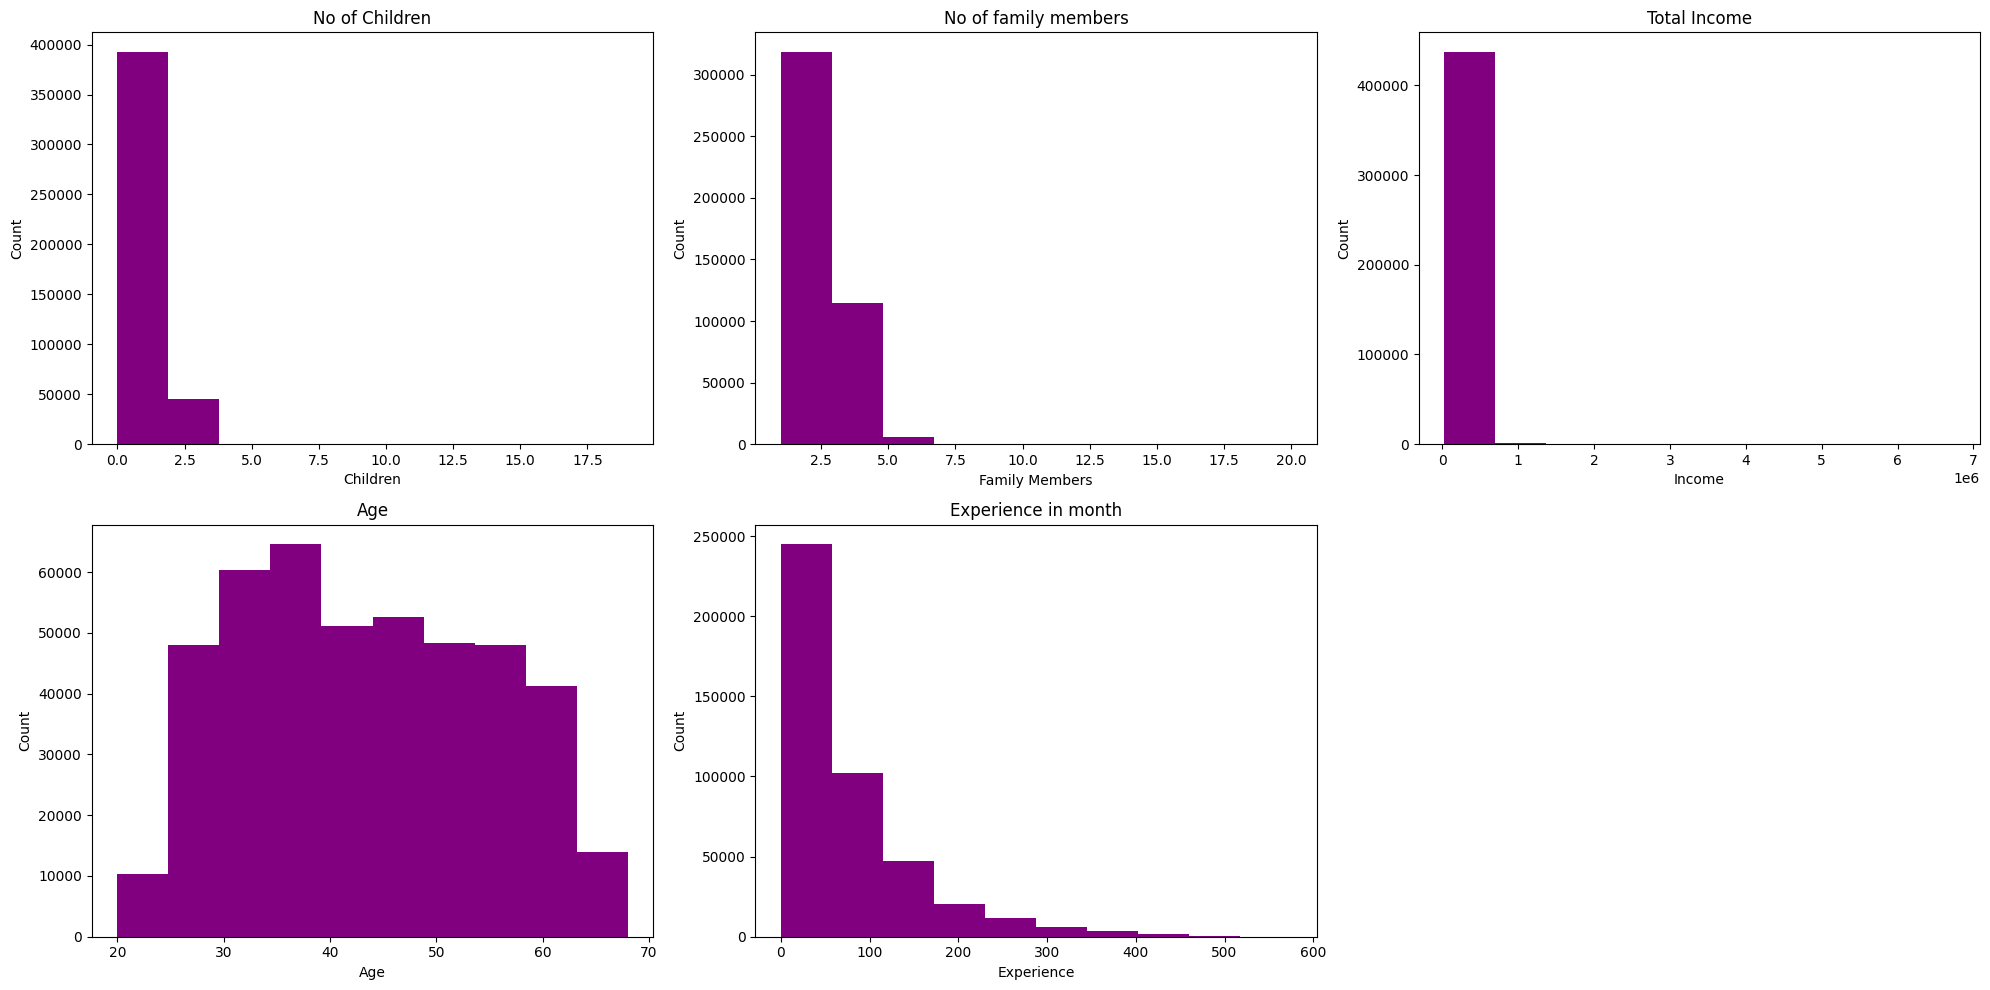

In [ ]:
# histogram
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(20,10))
fig.delaxes(axs[1,2])

# no of children
axs[0,0].hist(application_data['CNT_CHILDREN'], color='purple')
axs[0,0].set_title("No of Children")
axs[0,0].set_xlabel("Children")
axs[0,0].set_ylabel("Count")

# No of family members
axs[0,1].hist(application_data['CNT_FAM_MEMBERS'], color='purple')
axs[0,1].set_title("No of family members")
axs[0,1].set_xlabel("Family Members")
axs[0,1].set_ylabel("Count")

# Histogram of Total Income
axs[0,2].hist(application_data['AMT_INCOME_TOTAL'], color='purple')
axs[0,2].set_title("Total Income")
axs[0,2].set_xlabel("Income")
axs[0,2].set_ylabel("Count")

# Age
axs[1,0].hist(application_data['AGE'], color='purple')
axs[1,0].set_title("Age")
axs[1,0].set_xlabel("Age")
axs[1,0].set_ylabel("Count")


# Experience in month
axs[1,1].hist(application_data['EXPERIENCE_IN_MONTHS'], color='purple')
axs[1,1].set_title("Experience in month")
axs[1,1].set_xlabel("Experience")
axs[1,1].set_ylabel("Count")
plt.tight_layout()
plt.show()

Normalization

In [ ]:
selected_data = application_data[['CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AGE','EXPERIENCE_IN_MONTHS']]
application_data.drop(['CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AGE','EXPERIENCE_IN_MONTHS'], axis=1, inplace=True)

selected_data.info()
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CNT_CHILDREN          438557 non-null  int64  
 1   CNT_FAM_MEMBERS       438557 non-null  float64
 2   AMT_INCOME_TOTAL      438557 non-null  float64
 3   AGE                   438557 non-null  float64
 4   EXPERIENCE_IN_MONTHS  438557 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 16.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   438557 non-null  int64 
 1   MALE                 438557 non-null  int64 
 2   OWN_CAR              438557 non-null  int64 
 3   OWN_PROPERTY         438557 non-null  int64 
 4   NAME_INCOME_TYPE     438557 non-null  object
 5   NAME_EDUC

In [ ]:
# scalar those normalized data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)

scaled_df = pd.DataFrame(scaled_data, columns=selected_data.columns)
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CNT_CHILDREN          438557 non-null  float64
 1   CNT_FAM_MEMBERS       438557 non-null  float64
 2   AMT_INCOME_TOTAL      438557 non-null  float64
 3   AGE                   438557 non-null  float64
 4   EXPERIENCE_IN_MONTHS  438557 non-null  float64
dtypes: float64(5)
memory usage: 16.7 MB


histogram for normalized data

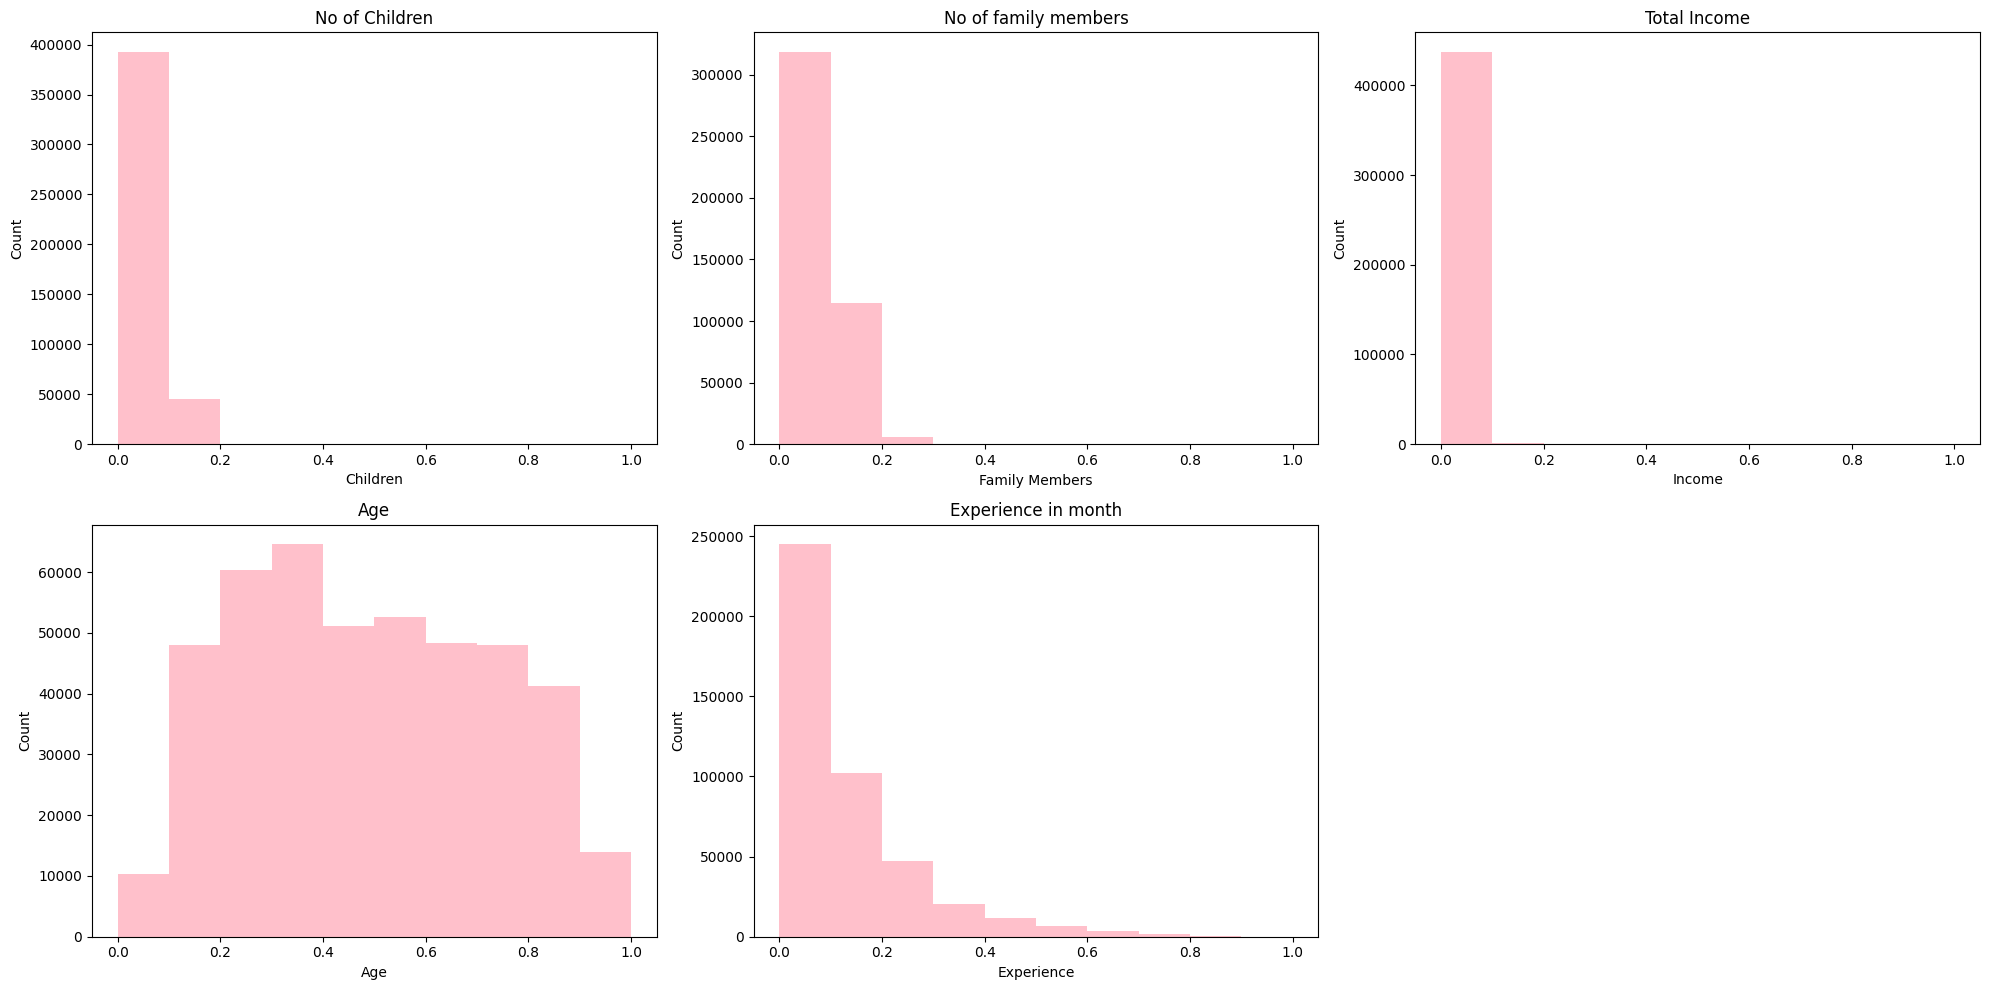

In [ ]:

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(20,10))
fig.delaxes(axs[1,2])

# no of children
axs[0,0].hist(scaled_df['CNT_CHILDREN'], color='pink')
axs[0,0].set_title("No of Children")
axs[0,0].set_xlabel("Children")
axs[0,0].set_ylabel("Count")

# No of family members
axs[0,1].hist(scaled_df['CNT_FAM_MEMBERS'], color='pink')
axs[0,1].set_title("No of family members")
axs[0,1].set_xlabel("Family Members")
axs[0,1].set_ylabel("Count")

# Histogram of Total Income
axs[0,2].hist(scaled_df['AMT_INCOME_TOTAL'], color='pink')
axs[0,2].set_title("Total Income")
axs[0,2].set_xlabel("Income")
axs[0,2].set_ylabel("Count")

# Age
axs[1,0].hist(scaled_df['AGE'], color='pink')
axs[1,0].set_title("Age")
axs[1,0].set_xlabel("Age")
axs[1,0].set_ylabel("Count")


# Experience in month
axs[1,1].hist(scaled_df['EXPERIENCE_IN_MONTHS'], color='pink')
axs[1,1].set_title("Experience in month")
axs[1,1].set_xlabel("Experience")
axs[1,1].set_ylabel("Count")
plt.tight_layout()
plt.show()

Box plots for normalized data

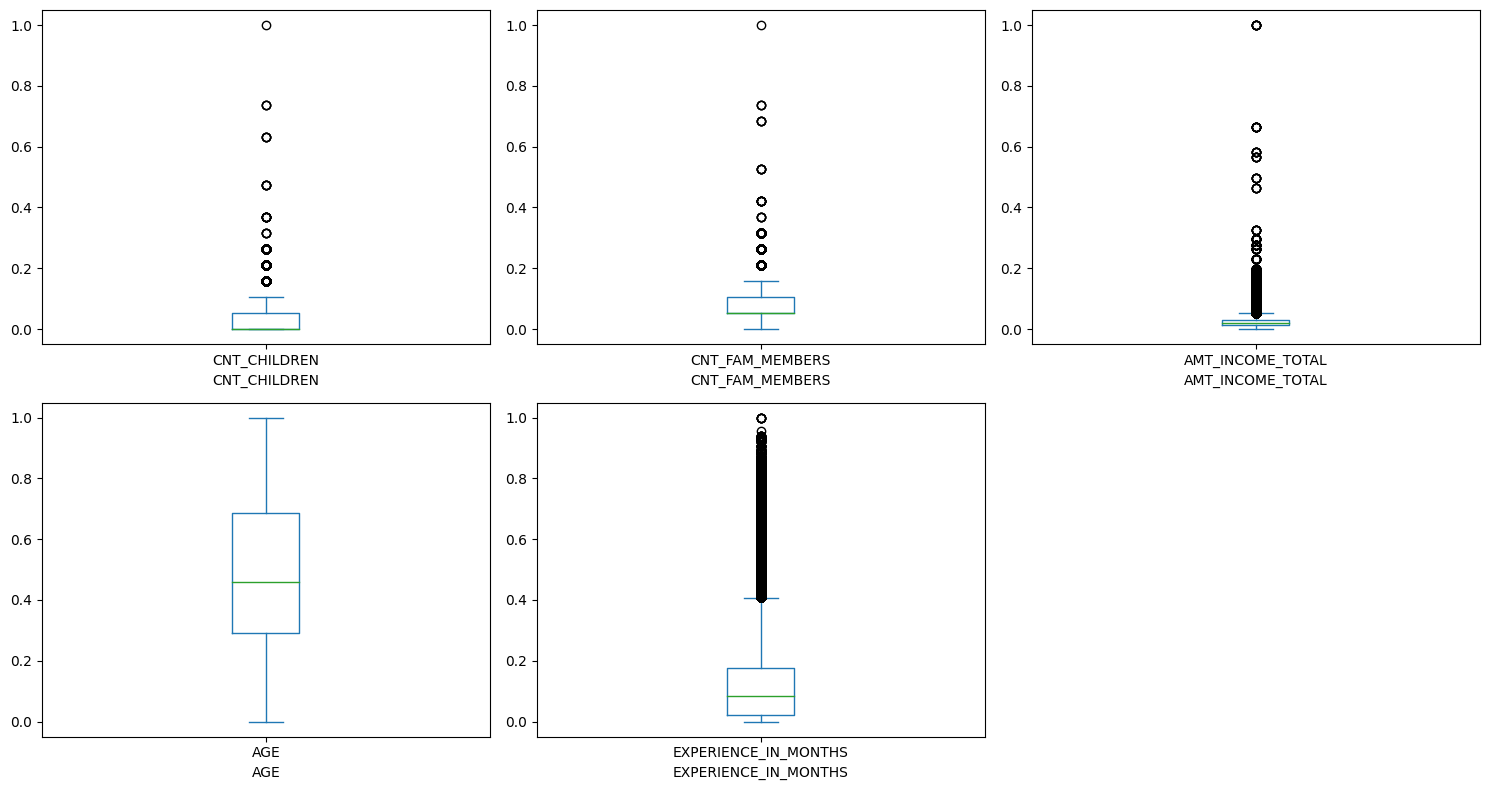

In [ ]:
plt.figure(figsize=(15, 8))
for i, feat in enumerate(scaled_df, 1):
    plt.subplot(2,3,i)
    plt.xlabel(feat)
    scaled_df[feat].plot(kind='box')
    plt.tight_layout()

plt.show()

Outlier reduction using IQR method

In [ ]:
Q1 = scaled_df.quantile(0.25)
Q3 = scaled_df.quantile(0.75)
IQR = Q3-Q1
threshold = 1.5

outliers_mask = ((scaled_df < (Q1 - threshold*IQR)) | (scaled_df > (Q3 + threshold*IQR))).any(axis=1)
newscaled_df = scaled_df[~outliers_mask]

newscaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392488 entries, 2 to 438556
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CNT_CHILDREN          392488 non-null  float64
 1   CNT_FAM_MEMBERS       392488 non-null  float64
 2   AMT_INCOME_TOTAL      392488 non-null  float64
 3   AGE                   392488 non-null  float64
 4   EXPERIENCE_IN_MONTHS  392488 non-null  float64
dtypes: float64(5)
memory usage: 18.0 MB


In [ ]:
# merge 'newscaled_df' and 'application data' dataframes
merged_data = pd.merge(application_data, newscaled_df, left_index=True, right_index=True, how='left')

In [ ]:
merged_data.isnull().sum()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    438557 non-null  int64  
 1   MALE                  438557 non-null  int64  
 2   OWN_CAR               438557 non-null  int64  
 3   OWN_PROPERTY          438557 non-null  int64  
 4   NAME_INCOME_TYPE      438557 non-null  object 
 5   NAME_EDUCATION_TYPE   438557 non-null  object 
 6   NAME_FAMILY_STATUS    438557 non-null  object 
 7   NAME_HOUSING_TYPE     438557 non-null  object 
 8   FLAG_MOBIL            438557 non-null  int64  
 9   FLAG_WORK_PHONE       438557 non-null  int64  
 10  FLAG_PHONE            438557 non-null  int64  
 11  FLAG_EMAIL            438557 non-null  int64  
 12  OCCUPATION_TYPE       304354 non-null  object 
 13  CNT_CHILDREN          392488 non-null  float64
 14  CNT_FAM_MEMBERS       392488 non-null  float64
 15  

Fill null vales using Mean

In [ ]:
mean_cnt_children = merged_data['CNT_CHILDREN'].mean()
merged_data['CNT_CHILDREN'].fillna(mean_cnt_children, inplace=True)

mean_cnt_fam_members = merged_data['CNT_FAM_MEMBERS'].mean()
merged_data['CNT_FAM_MEMBERS'].fillna(mean_cnt_fam_members, inplace=True)

mean_amt_income_total = merged_data['AMT_INCOME_TOTAL'].mean()
merged_data['AMT_INCOME_TOTAL'].fillna(mean_amt_income_total, inplace=True)

mean_age = merged_data['AGE'].mean()
merged_data['AGE'].fillna(mean_age, inplace=True)

mean_experience = merged_data['EXPERIENCE_IN_MONTHS'].mean()
merged_data['EXPERIENCE_IN_MONTHS'].fillna(mean_experience, inplace=True)

merged_data.info()
merged_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    438557 non-null  int64  
 1   MALE                  438557 non-null  int64  
 2   OWN_CAR               438557 non-null  int64  
 3   OWN_PROPERTY          438557 non-null  int64  
 4   NAME_INCOME_TYPE      438557 non-null  object 
 5   NAME_EDUCATION_TYPE   438557 non-null  object 
 6   NAME_FAMILY_STATUS    438557 non-null  object 
 7   NAME_HOUSING_TYPE     438557 non-null  object 
 8   FLAG_MOBIL            438557 non-null  int64  
 9   FLAG_WORK_PHONE       438557 non-null  int64  
 10  FLAG_PHONE            438557 non-null  int64  
 11  FLAG_EMAIL            438557 non-null  int64  
 12  OCCUPATION_TYPE       304354 non-null  object 
 13  CNT_CHILDREN          438557 non-null  float64
 14  CNT_FAM_MEMBERS       438557 non-null  float64
 15  

ID                           0
MALE                         0
OWN_CAR                      0
OWN_PROPERTY                 0
NAME_INCOME_TYPE             0
NAME_EDUCATION_TYPE          0
NAME_FAMILY_STATUS           0
NAME_HOUSING_TYPE            0
FLAG_MOBIL                   0
FLAG_WORK_PHONE              0
FLAG_PHONE                   0
FLAG_EMAIL                   0
OCCUPATION_TYPE         134203
CNT_CHILDREN                 0
CNT_FAM_MEMBERS              0
AMT_INCOME_TOTAL             0
AGE                          0
EXPERIENCE_IN_MONTHS         0
dtype: int64

In [ ]:
application_data = merged_data.copy()
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    438557 non-null  int64  
 1   MALE                  438557 non-null  int64  
 2   OWN_CAR               438557 non-null  int64  
 3   OWN_PROPERTY          438557 non-null  int64  
 4   NAME_INCOME_TYPE      438557 non-null  object 
 5   NAME_EDUCATION_TYPE   438557 non-null  object 
 6   NAME_FAMILY_STATUS    438557 non-null  object 
 7   NAME_HOUSING_TYPE     438557 non-null  object 
 8   FLAG_MOBIL            438557 non-null  int64  
 9   FLAG_WORK_PHONE       438557 non-null  int64  
 10  FLAG_PHONE            438557 non-null  int64  
 11  FLAG_EMAIL            438557 non-null  int64  
 12  OCCUPATION_TYPE       304354 non-null  object 
 13  CNT_CHILDREN          438557 non-null  float64
 14  CNT_FAM_MEMBERS       438557 non-null  float64
 15  

# categorical features

In [ ]:
application_data['NAME_INCOME_TYPE'].value_counts()

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
application_data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
application_data['NAME_FAMILY_STATUS'].value_counts()

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
application_data['NAME_HOUSING_TYPE'].value_counts()

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
application_data['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

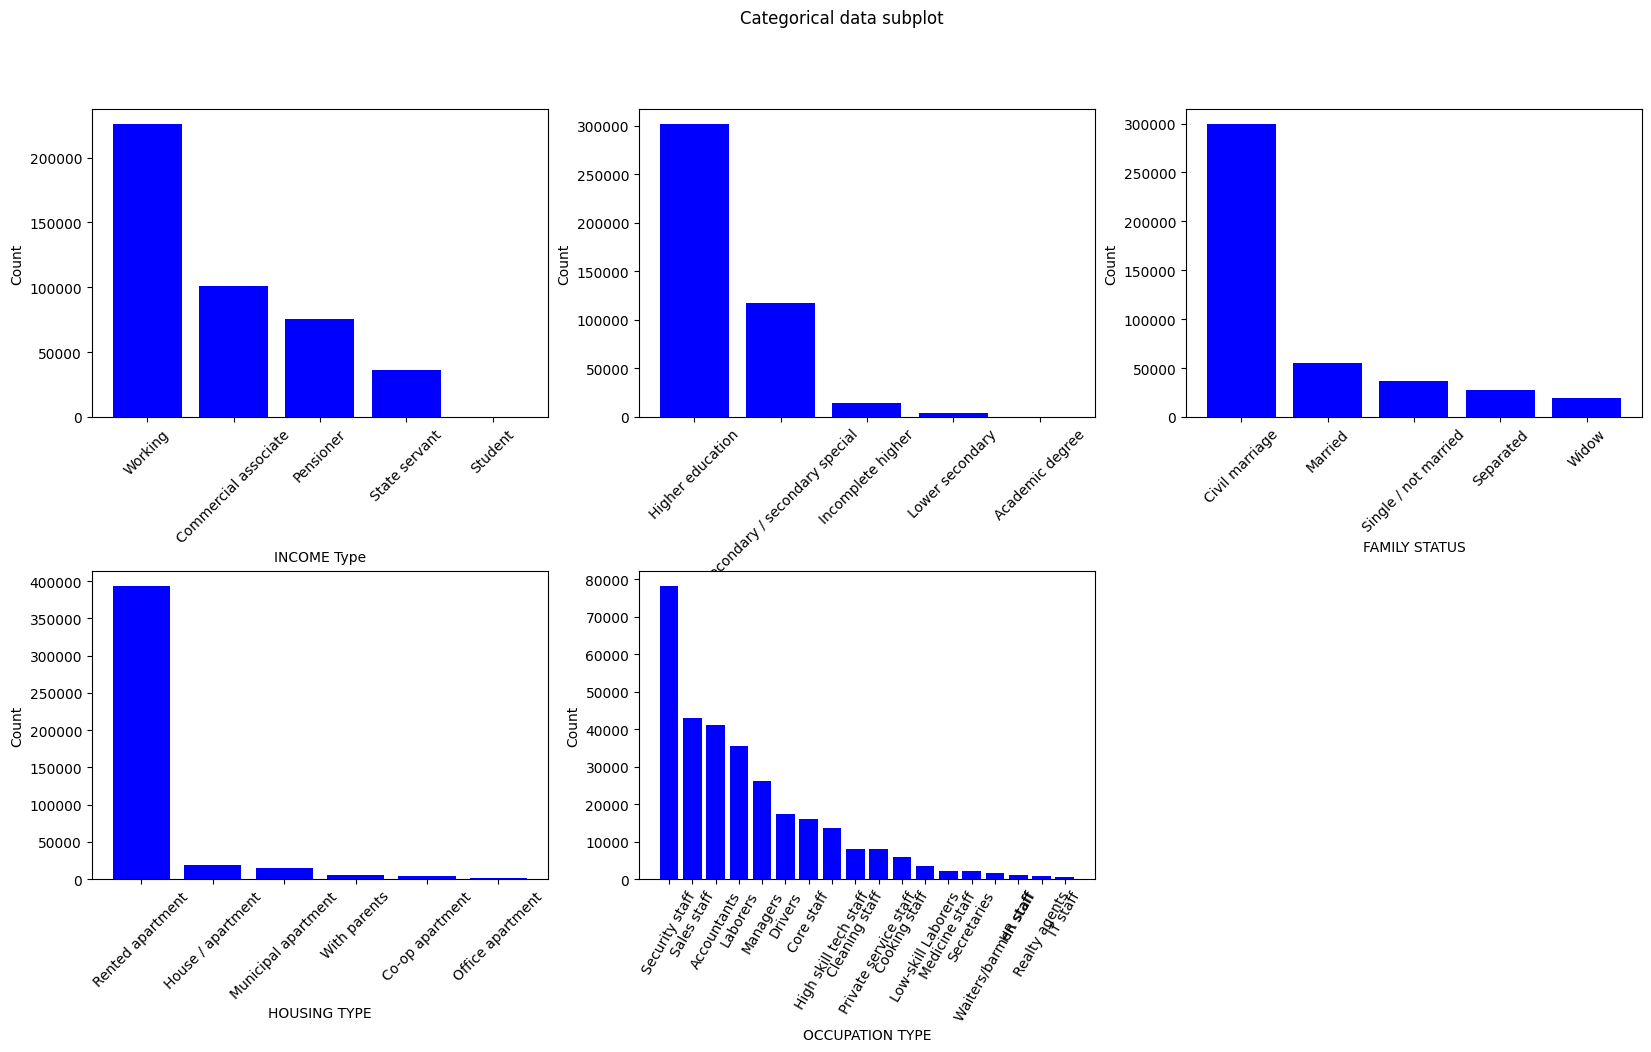

In [ ]:
# Bar chart for categorical data

category_1 = application_data['NAME_INCOME_TYPE'].unique()
category_2 = application_data['NAME_EDUCATION_TYPE'].unique()
category_3 = application_data['NAME_FAMILY_STATUS'].unique()
category_4 = application_data['NAME_HOUSING_TYPE'].unique()
category_5 = application_data.dropna(subset=['OCCUPATION_TYPE'])['OCCUPATION_TYPE'].unique()

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.delaxes(axs[1,2])

axs[0,0].bar(category_1, application_data['NAME_INCOME_TYPE'].value_counts(), color='blue')
axs[0,0].set_xlabel('INCOME Type')
axs[0,0].set_ylabel('Count')
axs[0,0].tick_params(axis='x', rotation=45)

axs[0,1].bar(category_2, application_data['NAME_EDUCATION_TYPE'].value_counts(), color='blue')
axs[0,1].set_xlabel('EDUCATION TYPE')
axs[0,1].set_ylabel('Count')
axs[0,1].tick_params(axis='x', rotation=45)

axs[0,2].bar(category_3, application_data['NAME_FAMILY_STATUS'].value_counts(), color='blue')
axs[0,2].set_xlabel('FAMILY STATUS')
axs[0,2].set_ylabel('Count')
axs[0,2].tick_params(axis='x', rotation=45)

axs[1,0].bar(category_4, application_data['NAME_HOUSING_TYPE'].value_counts(), color='blue')
axs[1,0].set_xlabel('HOUSING TYPE')
axs[1,0].set_ylabel('Count')
axs[1,0].tick_params(axis='x', rotation=45)

axs[1,1].bar(category_5, application_data.dropna(subset=['OCCUPATION_TYPE'])['OCCUPATION_TYPE'].value_counts(), color='blue')
axs[1,1].set_xlabel('OCCUPATION TYPE')
axs[1,1].set_ylabel('Count')
axs[1,1].tick_params(axis='x', rotation=60)

plt.suptitle('Categorical data subplot')
plt.show()

converting categorical features - onehotencoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
encoder = OneHotEncoder(dtype=int)
onehot = encoder.fit_transform(application_data[cols_to_encode]).toarray()
onehot_df = pd.DataFrame(onehot, columns=encoder.get_feature_names_out(cols_to_encode))

application_data = pd.concat([application_data.drop(cols_to_encode, axis=1), onehot_df], axis=1)

application_data.info()
application_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 53 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ID                                                 438557 non-null  int64  
 1   MALE                                               438557 non-null  int64  
 2   OWN_CAR                                            438557 non-null  int64  
 3   OWN_PROPERTY                                       438557 non-null  int64  
 4   FLAG_MOBIL                                         438557 non-null  int64  
 5   FLAG_WORK_PHONE                                    438557 non-null  int64  
 6   FLAG_PHONE                                         438557 non-null  int64  
 7   FLAG_EMAIL                                         438557 non-null  int64  
 8   CNT_CHILDREN                                       438557 non-null  float6

ID                                                   0
MALE                                                 0
OWN_CAR                                              0
OWN_PROPERTY                                         0
FLAG_MOBIL                                           0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_CHILDREN                                         0
CNT_FAM_MEMBERS                                      0
AMT_INCOME_TOTAL                                     0
AGE                                                  0
EXPERIENCE_IN_MONTHS                                 0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCA

# Credit Data.csv file

In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
credit_data['MONTHS_BALANCE'].value_counts()

-1     34436
-2     34209
 0     33856
-3     33854
-4     33365
       ...  
-56     2109
-57     1649
-58     1255
-59      820
-60      415
Name: MONTHS_BALANCE, Length: 61, dtype: int64

pre proccess 'months_balance' data in credit_card.csv

In [ ]:
# account open month
acc_open_month = abs(pd.DataFrame(credit_data.groupby(['ID'])['MONTHS_BALANCE'].agg('min')))
acc_open_month = acc_open_month.rename(columns={'MONTHS_BALANCE' : 'START_MONTH'})

application_data = pd.merge(application_data, acc_open_month, how="left", on="ID")
application_data['START_MONTH'].fillna(value=0, inplace=True)

application_data['START_MONTH'] = application_data['START_MONTH'].astype(int)

In [ ]:
# normalize acc_open_month
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_acc_open= scaler.fit_transform(acc_open_month)

Text(0, 0.5, 'Count')

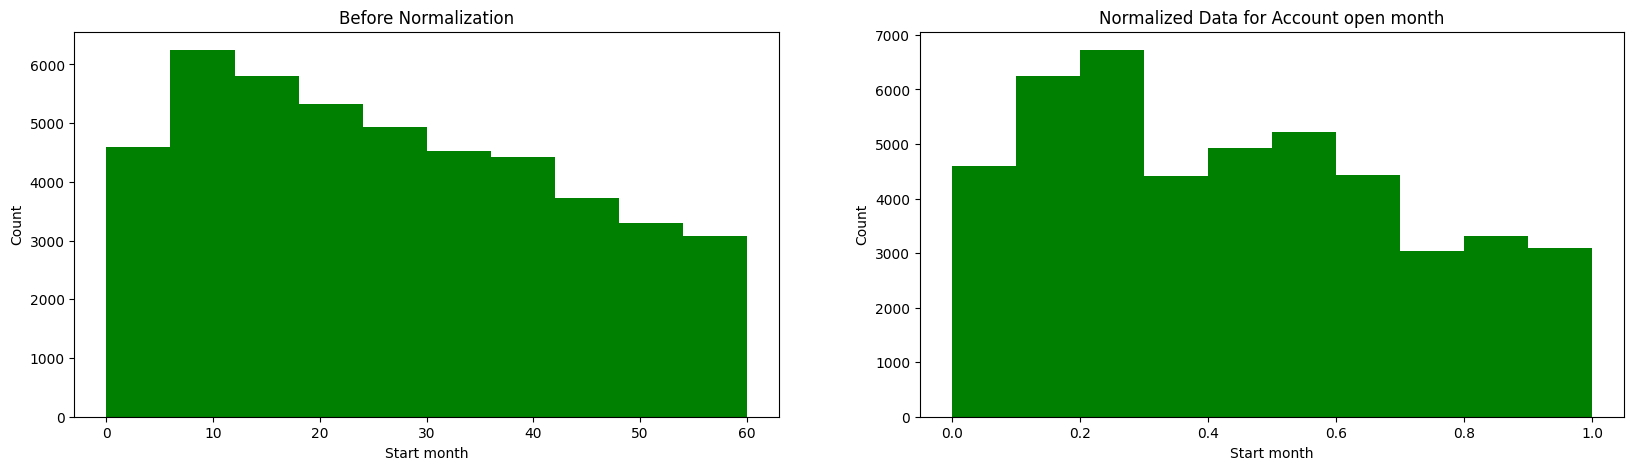

In [ ]:
#acc_open_month.plot.hist()

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20,5))

axs[0].hist(acc_open_month, color='green')
axs[0].set_title("Before Normalization")
axs[0].set_xlabel("Start month")
axs[0].set_ylabel("Count")

axs[1].hist(scaled_acc_open, color='green')
axs[1].set_title("Normalized Data for Account open month")
axs[1].set_xlabel("Start month")
axs[1].set_ylabel("Count")

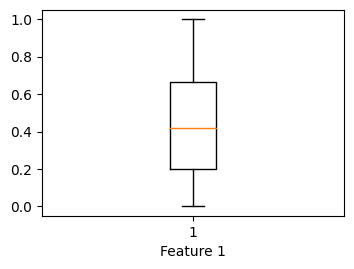

In [ ]:
# Assuming scaled_acc_open is a 2D NumPy array
num_features = scaled_acc_open.shape[1]

plt.figure(figsize=(10,5))
for i in range(1, num_features + 1):
    plt.subplot(2, 3, i)
    plt.xlabel(f"Feature {i}")
    plt.boxplot(scaled_acc_open[:, i-1])  # Use integer indexing for columns in NumPy array
    plt.tight_layout()

plt.show()


In [ ]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438557 entries, 0 to 438556
Data columns (total 54 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ID                                                 438557 non-null  int64  
 1   MALE                                               438557 non-null  int64  
 2   OWN_CAR                                            438557 non-null  int64  
 3   OWN_PROPERTY                                       438557 non-null  int64  
 4   FLAG_MOBIL                                         438557 non-null  int64  
 5   FLAG_WORK_PHONE                                    438557 non-null  int64  
 6   FLAG_PHONE                                         438557 non-null  int64  
 7   FLAG_EMAIL                                         438557 non-null  int64  
 8   CNT_CHILDREN                                       438557 non-null  float6

# target variable -'STATUS'

In [ ]:
credit_data['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [ ]:
# converting status

credit_data.loc[credit_data['STATUS'] == '2', 'DEF_VALUE'] = 'Yes'
credit_data.loc[credit_data['STATUS'] == '3', 'DEF_VALUE'] = 'Yes'
credit_data.loc[credit_data['STATUS'] == '4', 'DEF_VALUE'] = 'Yes'
credit_data.loc[credit_data['STATUS'] == '5', 'DEF_VALUE'] = 'Yes'

# credit_data.info()

In [ ]:
credit_new = credit_data.groupby('ID').count()
credit_new['DEF_VALUE'][credit_new['DEF_VALUE'] > 0 ] = 'Yes'
credit_new['DEF_VALUE'][credit_new['DEF_VALUE'] == 0 ] = 'No'
credit_new = credit_new[['DEF_VALUE']]

credit_new.value_counts()

DEF_VALUE
No           45318
Yes            667
dtype: int64

In [ ]:
credit_new_2 = pd.merge(application_data, credit_new, how='inner', on='ID')
credit_new_2['target'] = credit_new_2['DEF_VALUE']
credit_new_2.loc[credit_new_2['target'] == 'Yes', 'target'] = 1
credit_new_2.loc[credit_new_2['target'] == 'No', 'target'] = 0

credit_new_2.rename(columns={'target' : 'TARGET'}, inplace=True)

application_data = credit_new_2.drop('DEF_VALUE', axis=1)

0    35841
1      616
Name: TARGET, dtype: int64

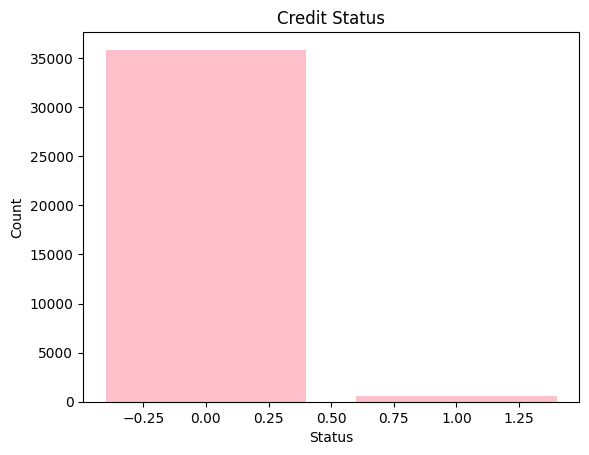

In [ ]:
fig_1, ax_1 = plt.subplots()
target_counts = application_data['TARGET'].value_counts()
ax_1.bar(target_counts.index, target_counts, color='pink')
ax_1.set_title("Credit Status")
ax_1.set_xlabel("Status")
ax_1.set_ylabel("Count")

application_data['TARGET'].value_counts()

In [ ]:
import re
application_data['TARGET'] = pd.to_numeric(application_data['TARGET'].apply(lambda x: re.sub(r'[^\d\.]','', str(x))), errors='coerce').iloc[:]

application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 55 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 36457 non-null  int64  
 1   MALE                                               36457 non-null  int64  
 2   OWN_CAR                                            36457 non-null  int64  
 3   OWN_PROPERTY                                       36457 non-null  int64  
 4   FLAG_MOBIL                                         36457 non-null  int64  
 5   FLAG_WORK_PHONE                                    36457 non-null  int64  
 6   FLAG_PHONE                                         36457 non-null  int64  
 7   FLAG_EMAIL                                         36457 non-null  int64  
 8   CNT_CHILDREN                                       36457 non-null  float64
 9   CNT_FA

In [ ]:
application_data.isnull().sum()

ID                                                   0
MALE                                                 0
OWN_CAR                                              0
OWN_PROPERTY                                         0
FLAG_MOBIL                                           0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_CHILDREN                                         0
CNT_FAM_MEMBERS                                      0
AMT_INCOME_TOTAL                                     0
AGE                                                  0
EXPERIENCE_IN_MONTHS                                 0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCA

In [ ]:
# this is pre proccessed data set.
final_data = application_data.copy()

**Feature** **Selection**

Heat map for the final_data.csv

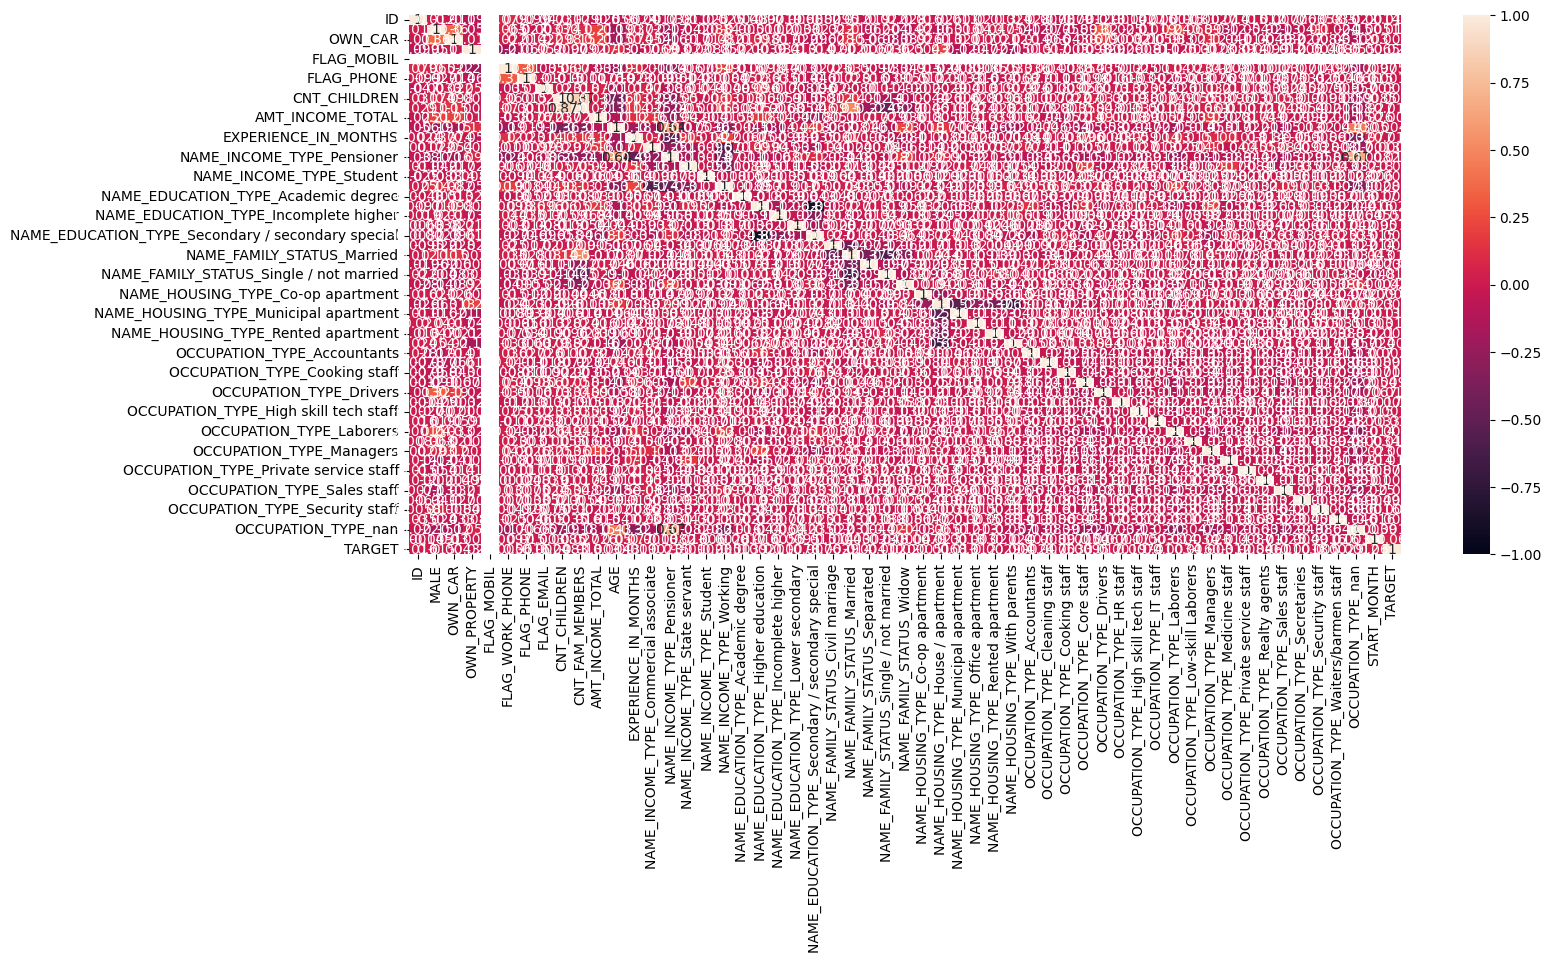

In [ ]:
plt.figure(figsize=(16,7))
heatmap = sns.heatmap(final_data.corr(), vmin=-1, vmax=1, annot=True)

correlation matrix for final_data.csv

In [ ]:
final_data.corr().T

,ID,MALE,OWN_CAR,OWN_PROPERTY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_CHILDREN,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,START_MONTH,TARGET
ID,1.000000,0.012022,-0.011163,-0.098851,NaN,0.079215,0.009879,-0.046979,0.031232,0.028836,...,0.014370,0.014616,0.012489,0.007745,0.006347,0.005772,0.035343,-0.021724,-0.001364,0.015588
MALE,0.012022,1.000000,0.361379,-0.050758,NaN,0.064994,-0.026833,-0.003284,0.073955,0.104071,...,-0.115488,-0.053998,-0.020151,-0.133468,-0.040708,0.102794,-0.024041,-0.152854,-0.005079,0.015292
OWN_CAR,-0.011163,0.361379,1.000000,-0.015185,NaN,0.021644,-0.014019,0.021750,0.097927,0.145581,...,-0.040532,-0.013808,-0.004858,-0.031771,-0.026697,-0.008401,-0.032859,-0.118775,0.029627,-0.004341
OWN_PROPERTY,-0.098851,-0.050758,-0.015185,1.000000,NaN,-0.207732,-0.066601,0.052194,-0.009704,-0.009170,...,-0.008927,0.013761,0.009924,-0.012238,-0.005005,-0.004594,0.008512,0.054780,-0.006476,-0.022247
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.079215,0.064994,0.021644,-0.207732,NaN,1.000000,0.311644,-0.034838,0.059524,0.072632,...,0.007993,-0.001073,-0.001153,0.029920,0.007098,0.004927,0.025482,-0.172137,0.009713,0.005640
FLAG_PHONE,0.009879,-0.026833,-0.014019,-0.066601,NaN,0.311644,1.000000,0.010455,-0.014870,-0.001069,...,-0.009697,0.010942,0.004799,0.007483,0.003263,-0.025478,-0.004624,0.006608,0.014893,0.001585
FLAG_EMAIL,-0.046979,-0.003284,0.021750,0.052194,NaN,-0.034838,0.010455,1.000000,0.022974,0.018444,...,0.010571,0.018005,0.003946,0.002389,0.005159,0.007506,-0.005030,-0.057025,-0.002978,-0.002434
CNT_CHILDREN,0.031232,0.073955,0.097927,-0.009704,NaN,0.059524,-0.014870,0.022974,1.000000,0.866819,...,0.009584,0.012833,0.010255,0.053300,0.016749,-0.009102,-0.003502,-0.193127,0.008511,-0.008292
CNT_FAM_MEMBERS,0.028836,0.104071,0.145581,-0.009170,NaN,0.072632,-0.001069,0.018444,0.866819,1.000000,...,0.010166,-0.007234,0.017127,0.048056,0.005366,-0.002041,-0.016166,-0.176402,0.026675,-0.013099


In [ ]:
# correlation with o/p
cor = final_data.corr()
cor_target = abs(cor['TARGET'])

high_corr_features = cor_target[cor_target > 0.01]
high_corr_features

ID                                         0.015588
MALE                                       0.015292
OWN_PROPERTY                               0.022247
CNT_FAM_MEMBERS                            0.013099
EXPERIENCE_IN_MONTHS                       0.018634
NAME_INCOME_TYPE_Pensioner                 0.014804
NAME_INCOME_TYPE_State servant             0.010430
NAME_EDUCATION_TYPE_Incomplete higher      0.010128
NAME_FAMILY_STATUS_Married                 0.013873
NAME_FAMILY_STATUS_Single / not married    0.012184
NAME_FAMILY_STATUS_Widow                   0.020275
NAME_HOUSING_TYPE_Municipal apartment      0.013447
NAME_HOUSING_TYPE_Office apartment         0.011522
OCCUPATION_TYPE_Drivers                    0.011662
OCCUPATION_TYPE_IT staff                   0.010428
OCCUPATION_TYPE_Low-skill Laborers         0.015529
OCCUPATION_TYPE_Medicine staff             0.012364
OCCUPATION_TYPE_Sales staff                0.010050
START_MONTH                                0.060215
TARGET      

In [ ]:
# building a model
from sklearn.model_selection import train_test_split

target_col = final_data['TARGET']
prediction_cols = final_data[['ID','MALE','OWN_PROPERTY','CNT_FAM_MEMBERS','EXPERIENCE_IN_MONTHS','NAME_INCOME_TYPE_Pensioner','NAME_INCOME_TYPE_State servant','NAME_EDUCATION_TYPE_Incomplete higher',
                              'NAME_FAMILY_STATUS_Married','NAME_FAMILY_STATUS_Single / not married','NAME_FAMILY_STATUS_Widow','NAME_HOUSING_TYPE_Municipal apartment',
                              'NAME_HOUSING_TYPE_Office apartment','OCCUPATION_TYPE_Drivers','OCCUPATION_TYPE_IT staff','OCCUPATION_TYPE_Low-skill Laborers',
                              'OCCUPATION_TYPE_Medicine staff','OCCUPATION_TYPE_Sales staff','START_MONTH']]

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(prediction_cols, target_col, test_size=0.2, random_state=1)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Handling imbalance using SMOTE

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print("Original Dataset shape :" , Counter(y_train))
print("Re-sample Dataset shape :" , Counter(y_smote))

Original Dataset shape : Counter({0: 28687, 1: 478})
Re-sample Dataset shape : Counter({0: 28687, 1: 28687})


# Training model using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(x_smote, y_smote)

LogisticRegression(random_state=0)

In [ ]:
# prediction of test set results
y_prediction = classifier.predict(X_test)

print(np.concatenate((y_prediction.reshape(len(y_prediction),1),y_test.to_numpy().reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


Test accuracy and Training accuracy of logistic regression

In [ ]:
from sklearn.metrics import accuracy_score

y_train_prediction = classifier.predict(x_smote)
train_accuracy = accuracy_score(y_smote, y_train_prediction)
print("Training Accuracy of logistic regression model : ", train_accuracy)

accuracy = accuracy_score(y_test, y_prediction)
print("Test Accuracy of logistic regression model     : ", accuracy)

Training Accuracy of logistic regression model :  0.629030571338934
Test Accuracy of logistic regression model     :  0.6338453099286889


Confusion matrix for logistic regression

In [ ]:
# model evaluation using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[4548 2606]
 [  64   74]]


ROC curve for logistic regression model

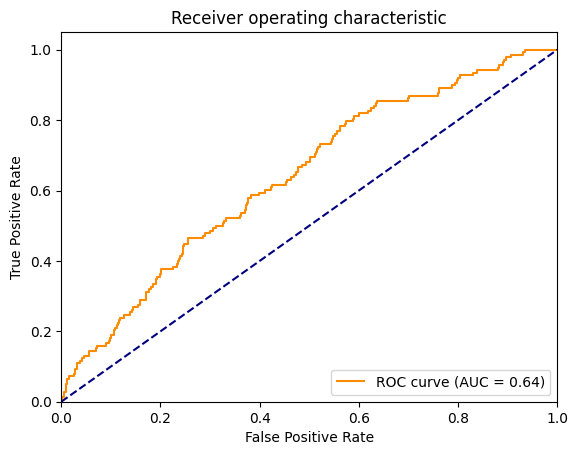

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba_lr = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Precision and Recall for logistic regression model

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_prediction, zero_division=1)
recall = recall_score(y_test, y_prediction, zero_division=1)

print('Precision: %.3f' % precision)
print('Recall   : %.3f' % recall)

Precision: 0.028
Recall   : 0.536


Hyper parameter tuning for Logistic regression

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
clf = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=5, scoring="accuracy")
clf.fit(x_smote,y_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},
             scoring='accuracy')

In [ ]:
print("Best combination of tuned hyperparameters                : ",clf.best_params_)
print("The average cross-validated score of logistic regression : ",clf.best_score_)

Best combination of tuned hyperparameters                :  {'C': 0.1}
The average cross-validated score of logistic regression :  0.628751609302912


# Training model using SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0, probability=True)
classifier.fit(x_smote, y_smote)

SVC(kernel='linear', probability=True, random_state=0)

In [ ]:
# prediction of test set results
y_prediction_svm = classifier.predict(X_test)

print(np.concatenate((y_prediction_svm.reshape(len(y_prediction_svm),1),y_test.to_numpy().reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


Test accuracy and Training accuracy of SVM model

In [ ]:
from sklearn.metrics import accuracy_score

y_train_prediction_svm = classifier.predict(x_smote)
train_accuracy_svm = accuracy_score(y_smote, y_train_prediction_svm)
print("Training Accuracy of svm model              : ", train_accuracy_svm)

accuracy_svm = accuracy_score(y_test, y_prediction_svm)
print("Test Accuracy of logistic regression model  : ", accuracy_svm)

Training Accuracy of svm model              :  0.6310698225677136
Test Accuracy of logistic regression model  :  0.6197202413603949


Confusion Matrix for SVM

In [ ]:
# model evaluation using confusion matrix
from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(y_test, y_prediction_svm)
print(cm_1)

[[4439 2715]
 [  58   80]]


ROC curve for SVM

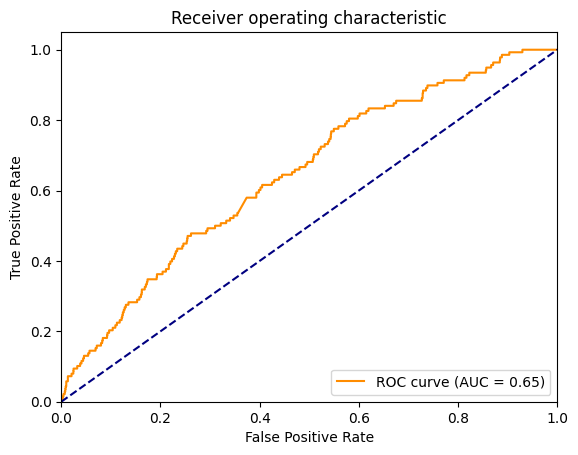

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Precision and Recall for SVM

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_prediction_svm, zero_division=1)
recall = recall_score(y_test, y_prediction_svm, zero_division=1)

print('Precision: %.3f' % precision)
print('Recall   : %.3f' % recall)

Precision: 0.029
Recall   : 0.580
